## PROG8245 Assignment 2: (Total Marks 100)
## Start on 11th of Feb.- Due on 23rd of Feb.

- TODO: write your name and ID below
- Name: Tai Siang Huang
- ID: 9006413
- Kindly note that this assignment is to be solved by yourself, without the use of AI and chatbots.
- If chatbot usage is detected, the penalty that is discussed in Week 1 slides will apply.
- Each code block will have a Todo comment which explains the functionality, expected input, and expected output of the function.
- There are 10 marks in this assignment for commenting and code readability.


## Part 1: Visualizations (34)
**NOTE:** Each question for plot in the visualization section is expected to be represented in **one** graph, using the library of your choice:

### **Question 1** 

#### Using the following dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv choose the most convenient graph to show the following: (18 Marks)


#### **1. The relationship between the penguin's bill length and bill depth for each species.** (5 marks)

In [791]:
## TODO: Check your attributes, make a graph using Matplotlib or Seaborn to show the relationship needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_penguin = pd.read_csv('penguins.csv')
print(df_penguin['species'].unique())
print(df_penguin['island'].unique())
print(df_penguin.isnull().sum())
print(df_penguin.shape)
df_penguin.dropna(inplace=True)
print(df_penguin.shape)
df_penguin.head()

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
(344, 7)
(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


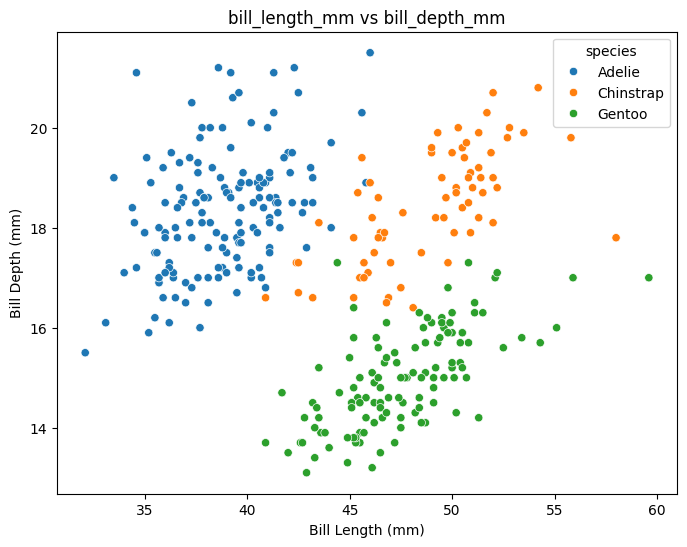

In [792]:
plt.figure(figsize=(8, 6))
# scatter
sns.scatterplot(data=df_penguin, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('bill_length_mm vs bill_depth_mm')
plt.show()

##### **What do you observe from the graph?** (2 marks)

Your answer here:

- It represents the shape of bill exist clear difference in those three species.

##### **Why did you choose this type of graph?** (2 marks)

Your answer here:
- By using scatterplot to find out whether there is a linear relationship or apparently distribution
- By using different colors for each species, it becomes easy to compare the distributions and see how they overlap or separate based on the two measured attributes

#### **2. Suitable graph of the mean BMI (BMI not body_mass; BMI Equation is: weight_in_kg/height^2) of female and male penguins. (Assume the height is the flipper length)**  (5 marks)


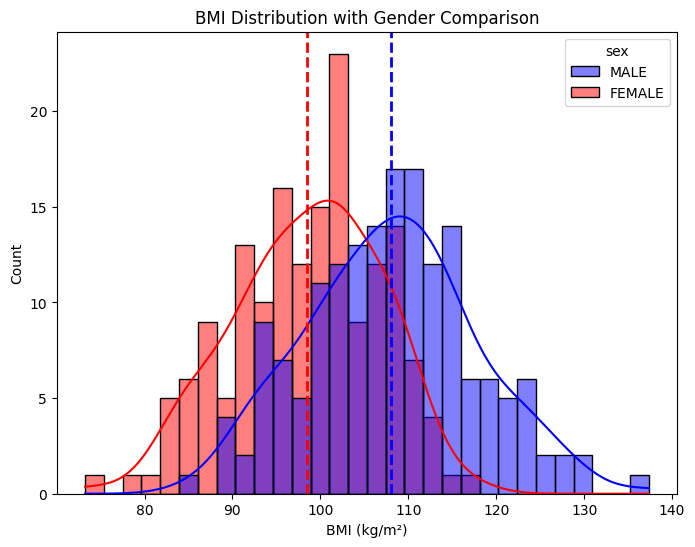

In [793]:
# Bmi = weight / height^2
df_penguin['bmi'] = (df_penguin['body_mass_g']/1000) / (df_penguin['flipper_length_mm']/1000) ** 2

mean_bmi = df_penguin.groupby('sex')['bmi'].mean().reset_index()
plt.figure(figsize=(8, 6))
# histogram plot of bmi for each sex
ax = sns.histplot(data=df_penguin, x='bmi', hue='sex', bins=30, kde=True, palette={'MALE': 'blue', 'FEMALE': 'red'})
# plot the mean of bmi line in the histogram
for sex in mean_bmi['sex']:  
    avg_value = mean_bmi[mean_bmi['sex'] == sex]['bmi'].values[0]
    ax.axvline(
        x=avg_value,
        color='red' if sex == 'FEMALE' else 'blue',  
        linestyle='--',
        linewidth=2,
        label=f'{sex} Mean'
    )


# plt.legend()
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Count')
plt.title('BMI Distribution with Gender Comparison')
plt.show()


##### **What do you observe from the graph?** (2 marks)

Your answer here:

- As the vertical dashed lines illustrate, male mean BMI is higher than female.

##### **Why did you choose this type of graph?** (2 marks)

Your answer here:

- Because it effectively displays the frequency distribution of continuous data (BMI) for two groups
- It makes easier to compare the shapes and central tendencies of the two groups.



### **Question 2**

#### You can find the csv file that contains the museum visitors data here: ./CSVs/museum_visitors.csv (8 marks)

Review the data by taking a look at a few of the rows.

In [794]:
# Your solution here
df_museum = pd.read_csv('museum_visitors.csv')
print(df_museum.isnull().sum())
print(df_museum.shape)
df_museum.head()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64
(59, 5)


,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

#### To show the museum board how the event compared to regular traffic at each museum, create a suitable chart that shows how the number of visitors to each museum evolved over time. (4 marks)

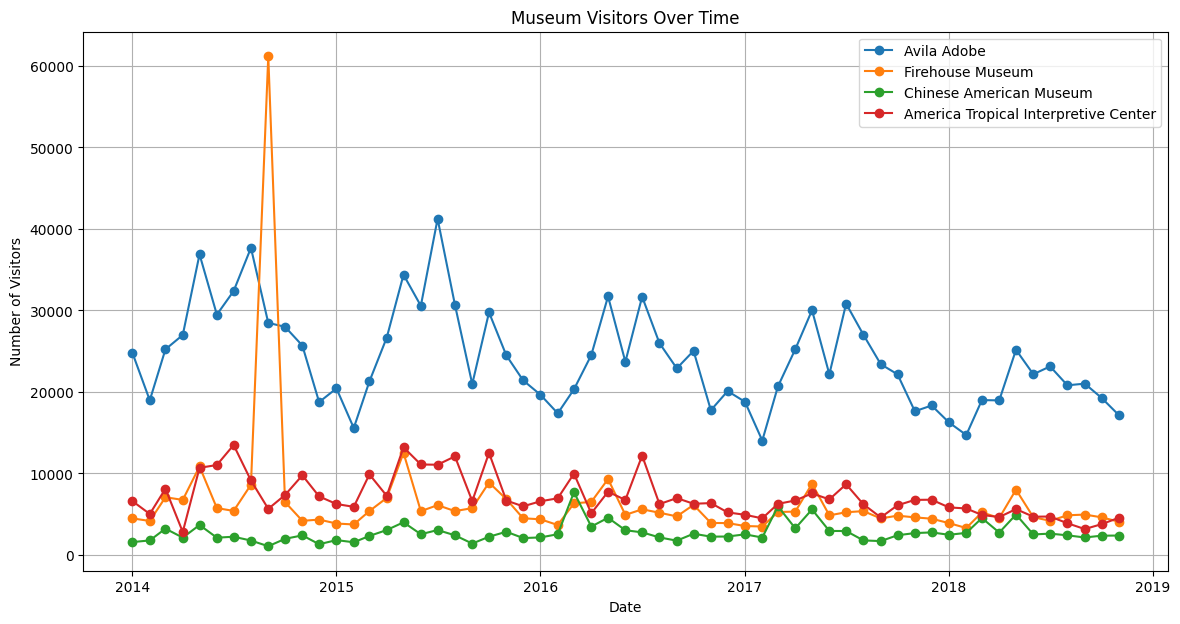

In [795]:
#Your solution here
# Convert 'Date' column to datetime format
df_museum['Date'] = pd.to_datetime(df_museum['Date'])

# Set 'Date' as the index
df_museum.set_index('Date', inplace=True)

# Plot the data with all mounthly point
plt.figure(figsize=(14, 7))
for column in df_museum.columns:
    plt.plot(df_museum.index, df_museum[column], marker='o', label=column)

plt.title('Museum Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.legend()
plt.grid(True)
plt.show()

##### What did you observe from the graph? (2 marks)

Your answer here
- The Avila Adobe consistently has the highest number of visitors compared to the other three locations.
- There is a significant spike in the number of visitors to the Firehouse Museum around September of 2014, which is even beyond the Avila Adobe numbers.
- It may seem to be classified as an outlier, not showing a growth trend, but reaching a peak instantly.

##### Why did you choose this type of graph? (2 marks)

You answer here

- A line graph works perfectly here because it shows how things change over time. It’s an easy way to compare trends between the four locations.
- Adding markers for each month highlights individual data points, making it easier to spot any weird spikes or dips in the numbers.

### **Question 3**

Using the file in ./CSVs/gas_prices.csv <br>
#### Use a suitable plot/graph that will show the relationship between the **average** gas price for each country  over all years (vs others). (8 marks)

First, review the data by taking a look at a few of the rows.

In [796]:
# Your solution here
df_gas = pd.read_csv('gas_prices.csv')
print(df_gas.isnull().sum())
print(df_gas.shape)
df_gas.head()

Year           0
Australia      1
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64
(19, 11)


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


#### Then Plot using the most suitable plot on your opinion (5 marks)

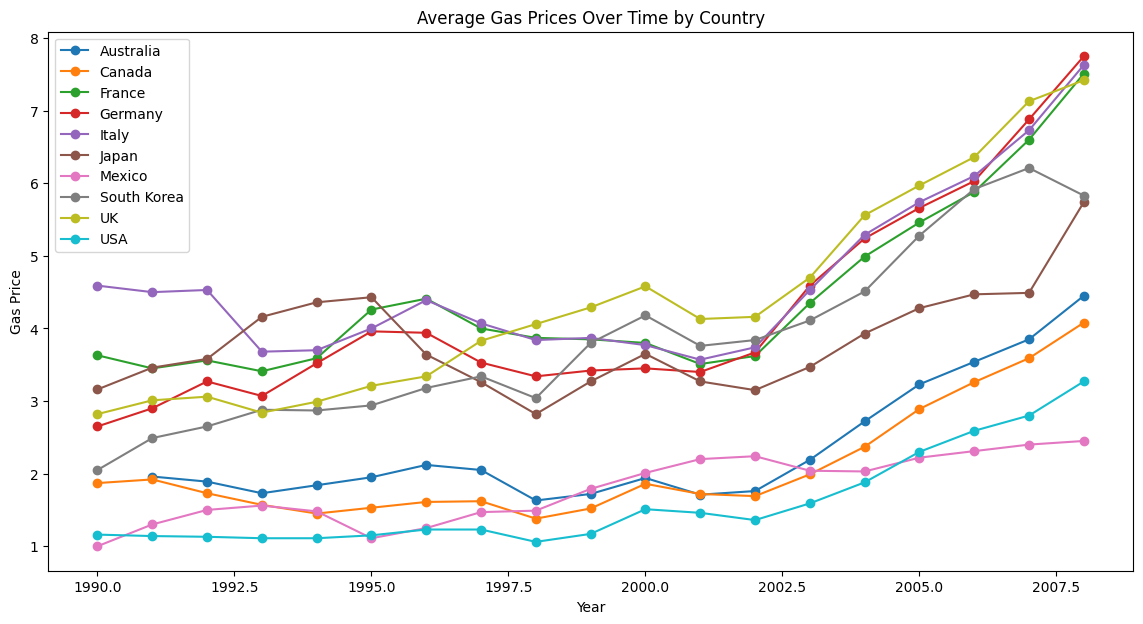

In [797]:
## Your solution here
# set index
df_gas.set_index('Year', inplace=True)

# Plot the data
plt.figure(figsize=(14, 7))
for column in df_gas.columns:
    plt.plot(df_gas.index, df_gas[column], marker='o', label=column)

plt.title('Average Gas Prices Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Gas Price')
plt.legend()
plt.show()


#### Is there anything interesting observed from the plot/graph? (1 mark)

Your answer here

- There is one missing data in Australia in 1990.
- Australia, Canada, USA and Mexico these four countries may have the capability to produce the oil, so it shows much lower price with gas than other countries.
- However, gas prices were rising overall. 

#### Why did you choose this type of graph? (2 marks)

You answer here

- Continuous price information can show the trend of gas prices over time, and by dividing it into different countries, it can also clearly understand the price gap between different countries.

## Part 2: Data Tidying and Preprocessing (24)

#### **Question 4:** (12)
**Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the **distinction** is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing. (12 Marks)

In [798]:
## TODO: Apply your Data Tidying Technique here
df_tb = pd.read_csv('tb-raw.csv')
print(df_tb.shape)
df_tb.head(10)

(10, 11)


,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


##### 1. Use the `melt` function to fix the general structure of the dataframe.

In [799]:
df_tb_melted = df_tb.melt(id_vars=['country', 'year'], var_name='sex_age_groups', value_name='cases')
print(df_tb_melted['sex_age_groups'].unique())
df_tb_melted

['m014' 'm1524' 'm2534' 'm3544' 'm4554' 'm5564' 'm65' 'mu' 'f014']


,country,year,sex_age_groups,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0
...,...,...,...,...
85,AM,2000,f014,1.0
86,AN,2000,f014,0.0
87,AO,2000,f014,247.0
88,AR,2000,f014,121.0


##### 2. Extract sex value into new column called `sex` (Female or Male) and remove m or f beginning word

In [800]:
def extract_sex(str):
    if str.startswith('m'):
        return 'Male'
    elif str.startswith('f'):
        return 'Female'
    else:
        return None

def remove_sex(str):
   return str[1:]

df_tb_melted['sex'] = df_tb_melted['sex_age_groups'].apply(extract_sex)
df_tb_melted['sex_age_groups'] = df_tb_melted['sex_age_groups'].apply(remove_sex)
print(df_tb_melted['sex_age_groups'].unique())
df_tb_melted

['014' '1524' '2534' '3544' '4554' '5564' '65' 'u']


,country,year,sex_age_groups,cases,sex
0,AD,2000,014,0.0,Male
1,AE,2000,014,2.0,Male
2,AF,2000,014,52.0,Male
3,AG,2000,014,0.0,Male
4,AL,2000,014,2.0,Male
...,...,...,...,...,...
85,AM,2000,014,1.0,Female
86,AN,2000,014,0.0,Female
87,AO,2000,014,247.0,Female
88,AR,2000,014,121.0,Female


##### 3. Reformat the value of `sex_age_groups` into `age_group` like '0~14','15~24' etc...

In [801]:
def reformat_age_group(str):
    if str == 'u':
        return 'Unknown'
    elif len(str) == 2:
        return '65+'
    elif len(str) == 3:
        return f"{str[0]}~{str[1:]}"
    else:
        return f"{str[:2]}~{str[2:]}"

df_tb_melted['age_group'] = df_tb_melted['sex_age_groups'].apply(reformat_age_group)
print(df_tb_melted['age_group'].unique())
df_tb_melted.drop(columns=['sex_age_groups'], inplace=True)
df_tb_melted

['0~14' '15~24' '25~34' '35~44' '45~54' '55~64' '65+' 'Unknown']


,country,year,cases,sex,age_group
0,AD,2000,0.0,Male,0~14
1,AE,2000,2.0,Male,0~14
2,AF,2000,52.0,Male,0~14
3,AG,2000,0.0,Male,0~14
4,AL,2000,2.0,Male,0~14
...,...,...,...,...,...
85,AM,2000,1.0,Female,0~14
86,AN,2000,0.0,Female,0~14
87,AO,2000,247.0,Female,0~14
88,AR,2000,121.0,Female,0~14


##### 4. Drop `Unknown` age due to it also missing with cases number, so it does not have meaning

In [802]:
print(df_tb_melted[df_tb_melted['age_group'] == 'Unknown'].shape)
print(df_tb_melted[df_tb_melted['age_group'] == 'Unknown'])
df_tb_melted = df_tb_melted[df_tb_melted['age_group'] != 'Unknown']


(10, 5)
   country  year  cases   sex age_group
70      AD  2000    NaN  Male   Unknown
71      AE  2000    NaN  Male   Unknown
72      AF  2000    NaN  Male   Unknown
73      AG  2000    NaN  Male   Unknown
74      AL  2000    NaN  Male   Unknown
75      AM  2000    NaN  Male   Unknown
76      AN  2000    NaN  Male   Unknown
77      AO  2000    NaN  Male   Unknown
78      AR  2000    NaN  Male   Unknown
79      AS  2000    NaN  Male   Unknown


##### 5. Other cases with NaN cases have to fill up with 0, to preserve original data as much as possible, instead of the possibility of manual loss

In [803]:
print(df_tb_melted[df_tb_melted['cases'].isnull()])
df_tb_melted.fillna(0, inplace=True)

   country  year  cases     sex age_group
9       AS  2000    NaN    Male      0~14
19      AS  2000    NaN    Male     15~24
29      AS  2000    NaN    Male     25~34
39      AS  2000    NaN    Male     35~44
69      AS  2000    NaN    Male       65+
80      AD  2000    NaN  Female      0~14
89      AS  2000    NaN  Female      0~14


C:\Users\patti\AppData\Local\Temp\ipykernel_12360\3658655329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tb_melted.fillna(0, inplace=True)


##### 6. Use `pivot_table` convert back to clear at a glance for some analysis

In [804]:
df_tb_tidy = (
    df_tb_melted
    .pivot_table(
        index=['country', 'year', 'sex'],  # divide into different 'country', 'year', 'sex'
        columns='age_group',               # new columns
        values='cases',                    # the numeric values to spread out
    )
    .reset_index()
)
# fill up 0 instead of NaN due to miss of Female data
df_tb_tidy.fillna(0, inplace=True)
df_tb_tidy

age_group,country,year,sex,0~14,15~24,25~34,35~44,45~54,55~64,65+
0,AD,2000,Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AD,2000,Male,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,AE,2000,Female,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AE,2000,Male,2.0,4.0,4.0,6.0,5.0,12.0,10.0
4,AF,2000,Female,93.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AF,2000,Male,52.0,228.0,183.0,149.0,129.0,94.0,80.0
6,AG,2000,Female,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,AG,2000,Male,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,AL,2000,Female,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AL,2000,Male,2.0,19.0,21.0,14.0,24.0,19.0,16.0


## Part 3: Feature Engineering (17)

#### Question 5- Feature Engineering - Attribute Correlation (17)
- Load the file income_data.csv, inspect the columns.
- Determine if race and education features have a statistical relationship. 
- Explain and conclude your findings (7 till here)
- Inspect the dataset carefully and create an Indicator Feature (0/1) --(3)
- Inspect the dataset carefully and create an Interaction Feature (Additional feature engineered from your dataset)-- (3)<br>
__The features you create must be resonable, please add an explanation to explain why did you chose those features__  (2 for each explanation -> 4)

##### 1. Load the csv file

In [805]:
## TODO: Start Question 6 code here
df_income = pd.read_csv('income_data.csv')
df_income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##### 2. Determine race and education features: use Chi-Square

In [806]:
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(df_income['race'], df_income['education'])

# Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-Square Statistic: 1040.6622432490267
P-value: 7.472985630264855e-179
Degrees of Freedom: 60
Expected Frequencies:
[[1.33661603e+01 1.74366324e+01 6.32222268e+00 2.37684779e+00
  4.89803857e+00 9.18983662e+00 7.27488637e+00 1.54062078e+01
  1.98327259e+01 7.72234962e+01 5.71598215e+00 1.51887310e+02
  2.55679538e+01 7.98697842e-01 8.02546988e+00 1.04677532e+02]
 [4.31982925e+01 5.63537120e+01 2.04328856e+01 7.68176979e+00
  1.58300438e+01 2.97007698e+01 2.35118136e+01 4.97915524e+01
  6.40976823e+01 2.49579767e+02 1.84735678e+01 4.90886860e+02
  8.26334507e+01 2.58132345e+00 2.59376356e+01 3.38308874e+02]
 [1.33235023e+02 1.73809836e+02 6.30204537e+01 2.36926211e+01
  4.88240654e+01 9.16050735e+01 7.25166865e+01 1.53570390e+02
  1.97694300e+02 7.69770382e+02 5.69773965e+01 1.51402563e+03
  2.54863540e+02 7.96148806e+00 7.99985668e+01 1.04343454e+03]
 [1.15460874e+01 1.50622825e+01 5.46132427e+00 2.05319192e+00
  4.23107162e+00 7.93845461e+00 6.28426354e+00 1.33083412e+01
  1.7132099

##### 3. Explain and conclude

- When the data are categorical variables, a common method is to perform a chi-square test.
- **`Null Hypothesis` (H<sub>0</sub>): The two variables "race" and "education" are `independent` of each other.**
- **`Alternative Hypothesis` (H<sub>1</sub>): The two variables "race" and "education" are `dependent` of each other.**
- For `60 degrees of freedom` and a significance level of `0.05`, the **critical value** is approximately `79.08`
- The Chi-Square statistic `(1040.66)` is greater than the critical value `(79.08)` and the very small p-value `(7.472985630264855e-179)`, both indicate strong evidence against the null hypothesis.
- As a result, there is a strong statistical relationship between race and education.

##### 4. Create an Indicator Feature

In [807]:
print(df_income['income'].unique())
# income only has two values
df_income['income_indicator'] = df_income['income'].apply(lambda x: 1 if x == '>50K' else 0)
df_income

['<=50K' '>50K']


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_indicator
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


##### 5. Create an Interaction Feature (Additional feature engineered from your dataset)

In [808]:
# Create an interaction feature combining capital-gain and capital-loss
df_income['capital-profit'] = df_income['capital-gain'] - df_income['capital-loss']
df_income[df_income['capital-loss'] != 0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_indicator,capital-profit
52,21,Private,214399,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K,0,-1721
82,24,Private,83141,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K,0,-1876
129,41,Private,239296,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K,1,-2415
143,43,Self-emp-inc,214503,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,45,United-States,>50K,1,-1887
154,40,State-gov,67874,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,45,United-States,>50K,1,-1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48722,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K,1,-1887
48724,18,Private,41381,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K,0,-1602
48726,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K,0,-1669
48739,36,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K,1,-1977


##### 6. Explanation of my Indicator and Interaction Features

**Indicator Feature:**
- `income` column has two categorical values (<=50K and >50K)
- Convert income into indicator feature is completely suitable that much easier to distinguish the income over 50k
- Binary features are also more interpretable and can simplify the analysis
  
**Interaction Feature:**
- By creating an interaction feature that calculates the capital profit (`capital-gain` - `capital-loss`), we can capture the overall financial health.
- `capital-profit` is able to do a lot of analysis, such as 
  - compare the `capital-profit` values between individuals with `income` <=50K and those with income >50K
  - study examined whether `age` affects `capital-profit`

## Part 4: Challenging Preprocessing Problems

#### Question 6: Implementing the Local Outlier Factor (LOF) Function (25)


- Local outlier factor is a function that labels outlier based on 2 predefined parameters, the first one is t **k** for k-Nearest-Neighbours. The second one is the threshold of outliers which could be set arbitrary. However, in this coding task you are required to BOX-PLOTS to determine the threshold for the local outlier factor and label your outliers.
- You are expected to implement different functions to reach the target which will be defined below.


**Euclidean Distance:** $$D = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$
**Manhattan Distance:** $$D = |x_1 - x_2| + |y_1 - y_2|$$

In [ ]:
from heapq import nsmallest

def euclidean_distance(point_a, point_b):
    return np.sqrt(np.sum((np.array(point_a) - np.array(point_b)) ** 2))

def manhattan_distance(point_a, point_b):
    return np.sum(np.abs(np.array(point_a) - np.array(point_b)))


def calculate_point_to_point_distance(point_a, point_b, distance_approach="Euclidean"):
    ## TODO: This function takes as an input two points (where each point is a pair of (x,y)) and returns the distance between the points.
    ## The distance is calculate based on given distance_approach
    ## You need to handle the Euclidean and Manhattan Distance Approaches in your code

    # Verify input point format
    for point in [point_a, point_b]:
        if not hasattr(point, '__iter__'):
            raise ValueError('Both point must be an iterable object.')
        
        for coord in point:
            if not isinstance(coord, (int, float)):
                raise ValueError(f"All coordinates in point_a and point_b must be numbers.")

    # Verify input points have the same dimenstions.
    if len(point_a) != len(point_b):
        raise ValueError("point_a and point_b must have the same number of dimensions.")

    # different approach
    if distance_approach == "Euclidean":
        return euclidean_distance(point_a, point_b)
    elif distance_approach == "Manhattan":
        return manhattan_distance(point_a, point_b)
    else:
        raise ValueError("Unsupported distance approach")

def get_points_lof(list_of_points, K=2, distance_approach = "Euclidean"):
    ## TODO: This function takes a list of points and returns a dictionary
    ## The dictionary is in format {point: LOF, ...}
    ## You can use as much helper functions as you'd like
    if K < 2:
        raise ValueError("K must be greater than 1 for LOF calculation.")
    
    # Calculate the k-nearest neighbors for each point
    def get_k_nearest_neighbors(point, list_of_points, k, distance_approach="Euclidean"):
        distances = []
        for p in list_of_points:
            if p != point:
                dist = calculate_point_to_point_distance(point, p, distance_approach=distance_approach)
                distances.append((dist, p))

        k_nearest = nsmallest(k, distances)
        nearest_points = [p for _, p in k_nearest]
        nearest_distances = [d for d, _ in k_nearest]

        return nearest_points, nearest_distances
    
    # Calculate the reachability distance for each point
    def reach_distance(p, x, k_distance_x):
        return max(k_distance_x, calculate_point_to_point_distance(p, x))
    
    # Calculate the local reachability density (LRD) for each point
    def local_reachability_density(neighbors, reach_distances):
        sum_reach_distances = sum(reach_distances)
        if sum_reach_distances != 0:
            lrd = len(neighbors) / sum_reach_distances

        return lrd
    
    # Calculate the Local Outlier Factor (LOF)
    def local_outlier_factor(neighbors, lrd_of_p, lrds_of_neighbors):
        return sum(lrds_of_neighbors) / (len(neighbors) * lrd_of_p)
    

    # Calculate the LOF score for each point
    lof_scores = {}
    
    for i, point in enumerate(list_of_points):
        point_tuple = tuple(point)
        # Step 2: Find K nearest neighbors and their distances
        neighbors, distances = get_k_nearest_neighbors(point, list_of_points, K, distance_approach)
        nd_p = distances[-1]  # Nk-distance of point p

        # Step 3: Calculate reachability distances
        reach_distances = [reach_distance(point, x, nd_p) for x in neighbors]
        # Step 4: Calculate LRD of point p
        lrd_of_p = local_reachability_density(neighbors, reach_distances)
        
        # Calculate LRDs of neighbors
        lrds_of_neighbors = []
        for x in neighbors:
            x_neighbors, x_distances = get_k_nearest_neighbors(x, list_of_points, K, distance_approach)
            x_nd = x_distances[-1]
            x_reach_distances = [reach_distance(x, y, x_nd) for y in x_neighbors]
            x_lrd = local_reachability_density(x_neighbors, x_reach_distances)
            lrds_of_neighbors.append(x_lrd)
        
        # Step 5: Calculate LOF of point p
        lof_p = local_outlier_factor(neighbors, lrd_of_p, lrds_of_neighbors)
        lof_scores[point_tuple] = lof_p
    
    return lof_scores

def get_outliers(list_of_points, K=2, distance_approach="Euclidean"):
    ## TODO: This function uses the get_points_lof to get the LOF scores, and uses it to build a box-plot
    ## Using the box-plot points are labelled as outliers are returned to the user
    ## Example: if point (2,1) and (3,2) are labelled as outliers using box-plot
    ## Then you will return the example given in the place-holder below

    # Verify all points must be numbers
    for point in list_of_points:
        for coord in point:
            if not isinstance(coord, (int, float)):
                raise ValueError("All coordinates in list_of_points must be numbers.")
            
    # Calculate LOF scores for all points
    lof_dict = get_points_lof(list_of_points, K, distance_approach)
    lof_scores = list(lof_dict.values())
    if not lof_scores:
        return []

    Q1 = np.percentile(lof_scores, 25)
    Q3 = np.percentile(lof_scores, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = []
    for point, lof in lof_dict.items():
        if lof > upper_bound:
            outliers.append(tuple(point))
    
    return outliers


##### To calculate the LOF you need to apply the following steps:
 1. Calculate the distance between each pair of points p1,p2
 2. Find your Kth nearest neighbor point (x) from current point (p):
    - After finding it, remember the distance *Nd* which is the distance from p to x, and save a set of elements which are in a neighborhood of *Nd* around point p.
    - Save the length of this set of elements.
 3. Calculate ReachDistance(x,p)=max(Nd_x, Distance(x,p))
 3. Calculate LRD (Local Reachability Distance) where LRD_p = length_of_set_p/Sum[ReachDistance(x,p)] (for each x in set of elements of point p)
 4. Calculate LOF (Local Outlier Factor) where LOF_p = {Sum[LRD_x] (for each x in set of elements of point p) * Sum[RD(x,p)] (for each x in set of elements of point p)} / length_of_set_p^2

In [810]:
## Example input
list_of_points = [[0,0],[-1,0],[0,-1],[1,0],[5,5]]
# get_outliers(list_of_points,2,distance_approach="Manhattan") ==> [(5,5)]
try:
    print(get_outliers(list_of_points, 2, distance_approach="Manhattan"))
except Exception as e:
    print('error:',e)


[(5, 5)]
